<a href="https://colab.research.google.com/github/lsharples1/6550Project/blob/main/models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pandas is a library, make use of pandas.DataFrame and methods. documentation: 
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html



In [1]:
#RUN THIS FIRST
#imports
import pandas as pd
from scipy.stats import shapiro
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from scipy import stats
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore') #there were a few warnings about methods that would be deprecated in future versions, but continue to work fine for the version of python we used

pd.set_option("display.max_rows", None, "display.max_columns", None)  #this just tells pandas to print the entire dataframe instead of constricting it to fit on one page

In [2]:
#RUN THIS SECOND


#STATES

#read in the datasets from .csv files uploaded to github
#2021
marijuanaData = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/state_marijuanaLaws.csv')
marijuanaData['LegalStatus'] = marijuanaData['LegalStatus'].str.replace(' ', '')

happinessData = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/states_happiness.csv')
crimeData = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/crimeRate.csv')
unempData = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/states_unemp_rates.csv')
statePop = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/state_popuation.csv')

stateGDPs = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/state20_21_gdp.csv')
unempData = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/states_unemp_rates.csv')
#get rid of the symbols and spaces in the data
stateGDPs['State'] = stateGDPs['State'].str.replace(' ','')
stateGDPs['State'] = stateGDPs['State'].str.replace('*','')

stateGDPs['2021'] = stateGDPs['2021'].str.replace('$','')
stateGDPs['2020'] = stateGDPs['2020'].str.replace('$','')

state2020happiness = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/stateHappiness2020.csv')
marijuanaLaws2020 = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/2020marijuanaLaws.csv')
crime2020 = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/crime2020.csv')


#COUNTRIES
#read in the datasets from .csv files uploaded to github
marijuanaDataC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/country_marijuanaLaws.csv')
lifeExpC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/countryLifeExpectancy.csv')
homicideC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/countryHomicideRate.csv')    #homicide is per 100000 people
happinessC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/countryHappinessScore.csv')
generosityC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/countryGenerosity.csv')
gdpC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/country_gdp.csv')
freedomC = pd.read_csv('https://raw.githubusercontent.com/lsharples1/6550Project/main/countryFreedomToMakeLifeChoices.csv')
gdpC = gdpC.drop(columns = ['gdp']) #drop this since we just want gdp per capita, it is more representative

merging the datasets, State is automatically chosen since it is the only column they share so it does not have to be specified
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Happiness_Rank
shapiro score (statistic, p-value before applying boxcox normalization
(0.9518184661865234, 0.002170937368646264)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.9532076120376587, 0.002654424635693431)

Score
shapiro score (statistic, p-value before applying boxcox normalization
(0.9843503832817078, 0.35494503378868103)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.9842210412025452, 0.34821030497550964)

Emotional_Physical_Wellbeing
shapiro score (statistic, p-value before applying boxcox normalization
(0.9481477737426758, 0.0012885953765362501)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.9512153267860413, 0.0019907099194824696)

Work_environment
shapiro score (statistic, p-value before applying boxcox normalization
(0.9542649984359741, 0.003097675507888198)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.956375777721405, 0.004231169354170561)

community_environm

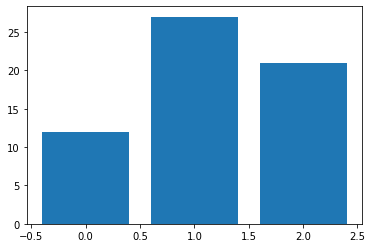

distributions of state legal status after oversampling
Class=1, n=200 (33.333%)
Class=2, n=200 (33.333%)
Class=0, n=200 (33.333%)


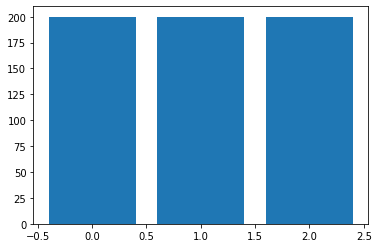

lifeExp
shapiro score (statistic, p-value) before applying boxcox normalization
(0.9500476121902466, 9.447557386010885e-05)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.9697828888893127, 0.004647860769182444)

homicideRate
shapiro score (statistic, p-value) before applying boxcox normalization
(0.5204280614852905, 5.297808514042343e-19)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.9901911020278931, 0.47353529930114746)

happinessScore
shapiro score (statistic, p-value) before applying boxcox normalization
(0.9876304268836975, 0.277960866689682)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.9878937602043152, 0.2944507598876953)

Generosity
shapiro score (statistic, p-value) before applying boxcox normalization
(0.945961594581604, 4.605889625963755e-05)
shapiro score (statistic, p-value) after applying boxcox normalization
(0.992624044418335, 0.717618465423584)

gdpPerCapita
shapiro score (statistic, p-

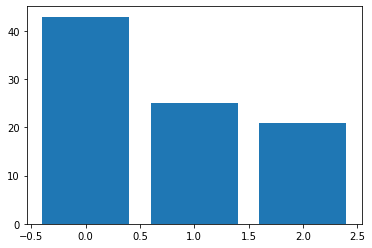

distributions of country legal status after oversampling
Class=0, n=200 (33.333%)
Class=1, n=200 (33.333%)
Class=2, n=200 (33.333%)


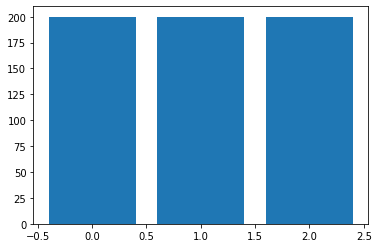

In [3]:
#RUN THIS THIRD

#merge 2021 data
data = marijuanaData.merge(right=happinessData)
data = data.merge(right=crimeData)
data = pd.merge(data,unempData[['State','2021_unempRate']],on='State', how='left')
data = pd.merge(data,stateGDPs[['State','2021']],on='State', how='left')

#merge 2020 data
data20 = marijuanaLaws2020.merge(right=state2020happiness)
data20 = data20.merge(right=crime2020)

data20 = pd.merge(data20,unempData[['State','2020_unempRate']],on='State', how='left')
data20 = pd.merge(data20,stateGDPs[['State','2020']],on='State', how='left')

data['State'] = data['State'].str.replace(' ', '')
data20['State'] = data20['State'].str.replace(' ', '')
data20['homicideRate'] = data20['homicideRate'].replace(0.0,0.1)

#dictionary to encode categorical to numerical
encode = {'LegalStatus': {'FullyIllegal':0, 'Mixed':1, 'FullyLegal':2},
             'Medicinal': {'Yes':1, 'No':0},
             'Decriminalized': {'Yes':1, 'No':0}}    
data = data.replace(encode) 

encode20 = {'LegalStatus': {'Illegal':0, 'Mixed':1, 'Legal':2}}
data20 = data20.replace(encode20)
#rename the columns of data (2021 state data) and data20 (2020 state data) so they have the same name and can later be appended
data = data.rename(columns={'2021_unempRate':'unempRate'})
data20 = data20.rename(columns={'2020_unempRate':'unempRate'})
data = data.rename(columns={'2021':'gdp'})
data20 = data20.rename(columns={'2020':'gdp'})


#merge country data into dataC dataframe
dataC = marijuanaDataC.merge(right=lifeExpC)
dataC = dataC.merge(right=homicideC)
dataC = dataC.merge(right=happinessC)
dataC = dataC.merge(right=generosityC)
dataC = dataC.merge(right=gdpC)
dataC = dataC.merge(right=freedomC)


dataC['Country'] = dataC['Country'].str.replace(' ','')
dataC = dataC.replace('no data',np.NaN)


encodeC = { 'Recreational': {'Illegal':0, 'Decriminalized':1, 'Legal':1}, 
           'Medical': {'Illegal':0, 'Decriminalized':1, 'Legal':1}}
dataC = dataC.replace(encodeC);
dataC['LegalStatus'] = dataC['Recreational'] + dataC['Medical'] #this makes it the same as states where if it is both rec and medical it is fully legal, only one mixed, and 0 fully illegal

###############################################################################################################

#NORMALIZE AND SCALE DATA

#this method calculates, prints, and creates a bar graph of the distributions of legal status
def distributions(y):
  #create and print distributions
  counter = Counter(y)
  for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
  # plot the distribution
  plt.bar(counter.keys(), counter.values())
  plt.show()



#instead of the usual 0,1 range, we make this range so no numbers will = 0. This is because some of the models and normalization methods can not take data that is <= 0
scaler = preprocessing.MinMaxScaler(feature_range=(0.001, 1.001)) #https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

#we want each class to be oversampled to 200 entries each in the testing data
strategy = {0:200, 1:200, 2:200} 
oversample = SMOTE(sampling_strategy = strategy)

#STATES

#combine 2020 and 2021 state data so that dataset is big enough
data = data.append(data20)
targetS = data.LegalStatus

#create dataframes of specific legal statuses
illegalStates = data.loc[data['LegalStatus'] == 0]
legalStates = data.loc[data['LegalStatus'] == 2]
mixedStates = data.loc[data['LegalStatus'] == 1]



#multiclass classification of legal status (0,1,2)
#State  LegalStatus  Medicinal  Decriminalized  -> drop these columns for classifier, 
#having the state name has no effect on the legality. drop legalStatus since we set 
#it to our y-value/target. drop medicinal and decriminalized for now to just test legalStatus
dataS = data[['Happiness_Rank', 'Score', 'Emotional_Physical_Wellbeing',
       'Work_environment', 'community_environment', 'homicideRate',
       'firearmDeathRate', 'firearmDeaths', 'gdp',
       'unempRate']]   
dataS['gdp'] = dataS['gdp'].str.replace(',','')

dataS = dataS.apply(pd.to_numeric)
dataS['gdp'] = dataS['gdp'].fillna(dataS['gdp'].median())
dataS['firearmDeathRate'] = dataS['firearmDeathRate'].fillna(dataS['firearmDeathRate'].median())
dataS['firearmDeaths'] = dataS['firearmDeaths'].fillna(dataS['firearmDeaths'].median())

#set x and y for state data
xS = dataS.apply(pd.to_numeric)
stateNonNormal = dataS.apply(pd.to_numeric)
#stateNonNormal = stateNonNormal[['homicideRate', 'firearmDeathRate', 'firearmDeaths', 'gdp', 'unempRate']]  
yS = targetS.apply(pd.to_numeric)

#normalization function for states, normalizes each column, prints out the boxcox value before and after normalization, updates the dataframe with the normalized value
def normalizeXS(col):
  print(col)
  print('shapiro score (statistic, p-value before applying boxcox normalization')
  print(stats.shapiro(xS[col]))
  hom = np.asarray(xS[[col]].values)
  homBox = stats.boxcox(hom.ravel())[0]
  print('shapiro score (statistic, p-value) after applying boxcox normalization')
  print(stats.shapiro(homBox))
  xS[col] = pd.DataFrame(homBox)
  print()

#iterate through the dataframe, normalizing the columns
for(columnName, columnData) in xS.iteritems():
  normalizeXS(columnName)

#drop the columns that do not pass the normalize test
xS = xS[['homicideRate', 'firearmDeathRate', 'firearmDeaths', 'gdp', 'unempRate']]  
XSS = scaler.fit_transform(xS.to_numpy()) #scale so no negatives for the models

#train and test sets
XS_train, XS_test, YS_train, YS_test = train_test_split(xS, yS, test_size = 0.33,random_state=42)

XS_train_non, XS_test_non, YS_train_non, YS_test_non = train_test_split(stateNonNormal, yS, test_size = 0.33,random_state=42)


print('distributions of state legal status before oversampling')
distributions(YS_train)   
#oversample with SMOTE
XS_train, YS_train = oversample.fit_resample(XS_train,YS_train)
print('distributions of state legal status after oversampling')
distributions(YS_train)







#COUNTRIES
#multiclass classification of legal countries (0,1,2)
targetC = dataC.LegalStatus

#Country  LegalStatus  Medical  Recreational  -> drop these columns for classifier, having the country name has no effect on the legality of weed. drop legalStatus since we set it to our y-value. drop medicinal and recreational for now to just test legalStatus
dataC2 = dataC[['lifeExp', 'homicideRate',
       'happinessScore', 'Generosity', 'gdpPerCapita', 'Freedom_life_choices']] 

#set x and y for state data
xC = dataC2.apply(pd.to_numeric)
yC = targetC

#scale data so between 0.001 and 1.001, since boxcox normalizer can not take <=0 and generosity has negative values

xC['Generosity'] = scaler.fit_transform(xC['Generosity'].values.reshape(-1,1)) 
#xC = pd.DataFrame(XCS, columns = xC.columns) #this keeps the scaled data in the form of a dataframe- easier to intepret while testing


#normalization for countries
def normalizeXC(col):
  print(col)
  print('shapiro score (statistic, p-value) before applying boxcox normalization')
  print(stats.shapiro(xC[col]))
  hom = np.asarray(xC[[col]].values)
  homBox = stats.boxcox(hom.ravel())[0]
  print('shapiro score (statistic, p-value) after applying boxcox normalization')
  print(stats.shapiro(homBox))
  xC[col] = pd.DataFrame(homBox)
  print()

for(columnName, columnData) in xC.iteritems():
  normalizeXC(columnName)

knnXC = xC[['homicideRate',
      'happinessScore', 'Generosity']]
knnScaled = scaler.fit_transform(knnXC) #scale so no negatives for the models
xCS = scaler.fit_transform(xC)
#train and test sets with the scaled data
XC_train, XC_test, YC_train, YC_test = train_test_split(xC, yC, test_size = 0.33, random_state=42)
XC_train_K, XC_test_K, YC_train_K, YC_test_K = train_test_split(knnScaled, yC, test_size = 0.33, random_state=42) #for Gaussian NB and KNN models, created train and test for the data with only features that pass normalize test
XC_train_M, XC_test_M, YC_train_M, YC_test_M = train_test_split(xCS, yC, test_size = 0.33, random_state=42) #for Gaussian NB and KNN models, created train and test for the data with only features that pass normalize test

print('distributions of country legal status before oversampling')
distributions(YC_train)   
#oversample with SMOTE
XC_train, YC_train = oversample.fit_resample(XC_train,YC_train)
print('distributions of country legal status after oversampling')
distributions(YC_train)

Multiclass classification- for legalWeedStatus, we have FullyLegal, Mixed, and FullyIllegal. https://www.mygreatlearning.com/blog/multiclass-classification-explained/ <br>


Our y value will be legalWeedStatus, and variables will be   'Score',
       'Emotional_Physical_Wellbeing', 'Work_environment',
       'community_environment', 'homicideRate', 'firearmDeathRate',
       'firearmDeaths', 'gdp', 'unempRate'

In [4]:
#RUN THIS FOURTH

from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics as metrics
#function to print confusion matrix and accuracy
def plot(classifier, x, y, title, y_pred): 
    class_names = ["Illegal", "Mixed", "Legal"]
    disp = plot_confusion_matrix(classifier, x, y,
                                 display_labels=class_names,
                                 cmap=plt.cm.PuRd
                                   )
    disp.ax_.set_title(title)
    plt.show() 
    print('accuracy: ')
    print(metrics.accuracy_score(y, y_pred))
    print('-------------------------------')


Gaussian Naive Bayes- Gaussian: It is used in classification and it assumes that features follow a normal distribution. https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ <br> https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html <br>

K-Nearest-Neighbor- https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

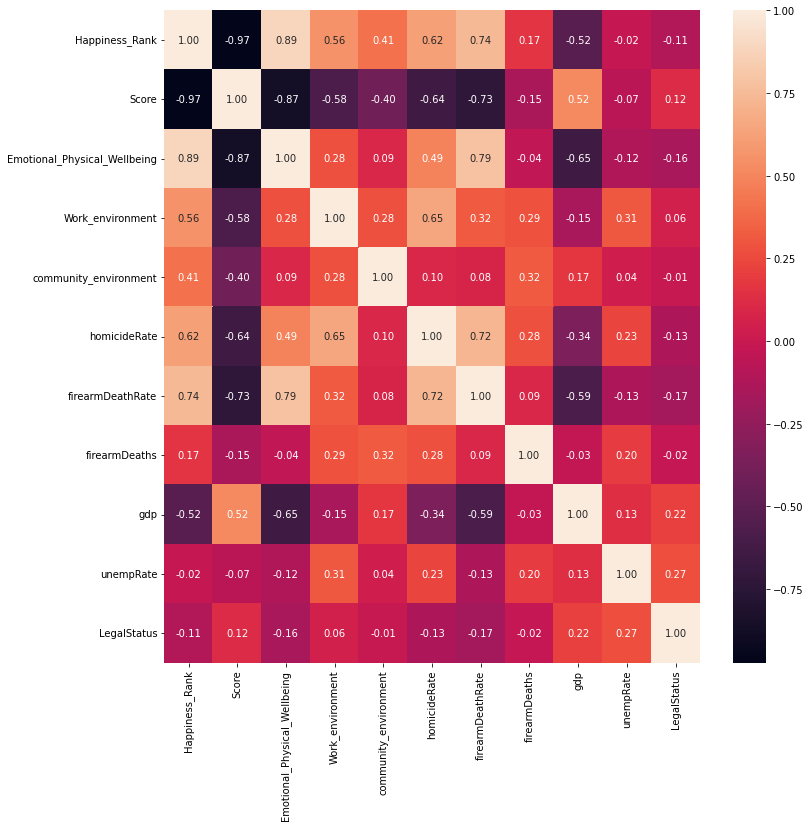

In [5]:
#correlation for states

stateData = dataS
stateData["LegalStatus"] = targetS
plt.figure(figsize=(12,12))
sns.heatmap(stateData.corr(method='pearson'),annot=True,fmt='.2f')



<function matplotlib.pyplot.show>

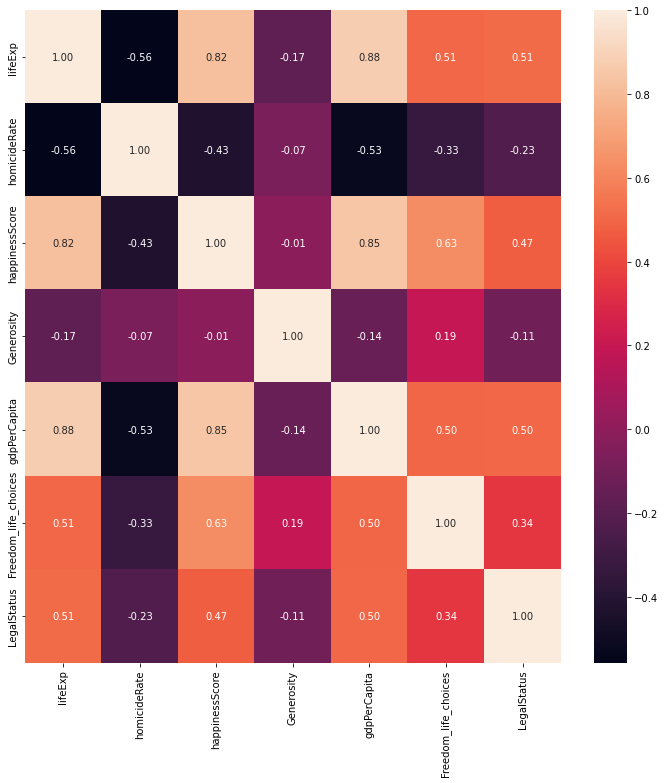

In [6]:
#correlation for countries
countryData = xC
countryData["LegalStatus"] = yC
plt.figure(figsize=(12,12))
sns.heatmap(countryData.corr(method='pearson'),annot=True,fmt='.2f')
plt.show

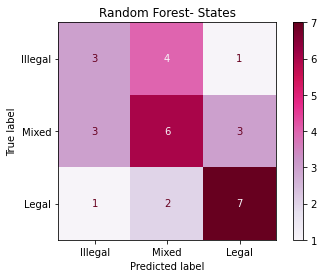

accuracy: 
0.5333333333333333
-------------------------------


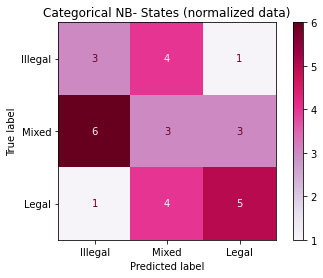

accuracy: 
0.36666666666666664
-------------------------------


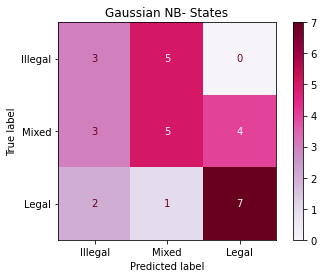

accuracy: 
0.5
-------------------------------


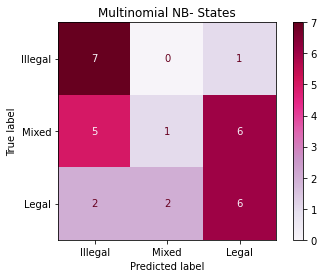

accuracy: 
0.4666666666666667
-------------------------------


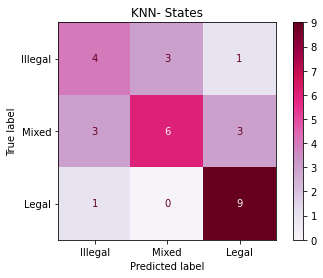

accuracy: 
0.6333333333333333
-------------------------------
decision tree feature importances
Happiness_Rank, Score, Emotional_Physical_Wellbeing, Work_environment, community_environment, homicideRate, firearmDeathRate, firearmDeaths, gdp, unempRate
[0.05226013 0.12904637 0.04286964 0.24782032 0.03499563 0.10315665
 0.07786527 0.19981252 0.         0.11217348]


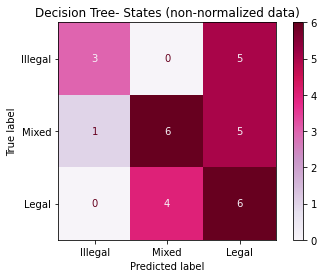

accuracy: 
0.5
-------------------------------
decision tree feature importances
homicideRate firearmDeathRate firearmDeaths gdp unempRate
[0.19205067 0.17271806 0.2283725  0.07460445 0.33225432]


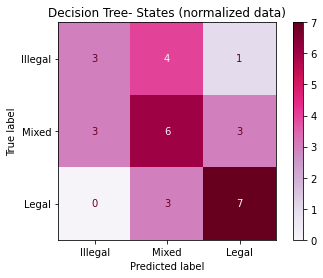

accuracy: 
0.5333333333333333
-------------------------------


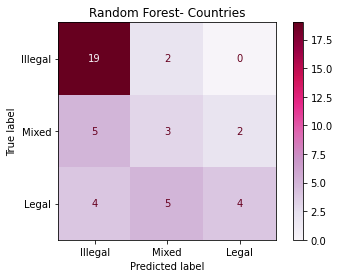

accuracy: 
0.5909090909090909
-------------------------------


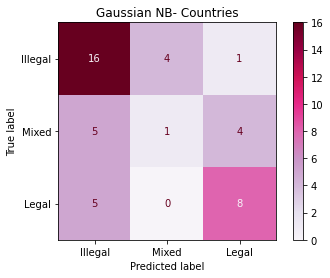

accuracy: 
0.5681818181818182
-------------------------------


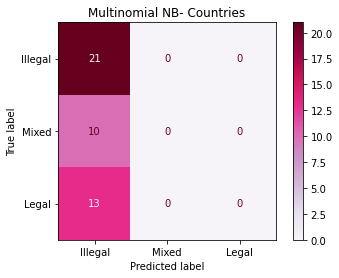

accuracy: 
0.4772727272727273
-------------------------------


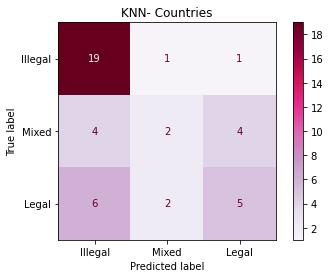

accuracy: 
0.5909090909090909
-------------------------------
decision tree feature importances
lifeExp homicideRate happinessScore Generosity gdpPerCapita Freedom_life_choices
[0.27218383 0.24204774 0.24224678 0.06586678 0.05323654 0.12441833]


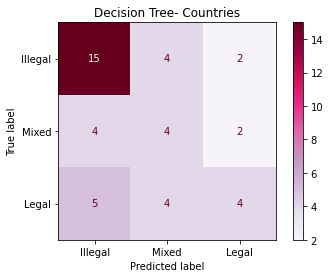

accuracy: 
0.5227272727272727
-------------------------------


In [7]:
#RUN THIS FIFTH

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#STATES

clfRFS = RandomForestClassifier().fit(XS_train, YS_train)
y_predRFS = clfRFS.predict(XS_test)
plot(clfRFS, XS_test, YS_test, "Random Forest- States", y_predRFS)

cnbSN = CategoricalNB().fit(XS_train, YS_train)
y_predCSN = cnbSN.predict(XS_test)               
plot(cnbSN, XS_test, YS_test, "Categorical NB- States (normalized data)", y_predCSN)

clfGS = GaussianNB().fit(XS_train, YS_train) 
y_predGS = clfGS.predict(XS_test)               
plot(clfGS, XS_test, YS_test, "Gaussian NB- States", y_predGS)

clfMS = MultinomialNB().fit(XS_train, YS_train) 
y_predMS = clfMS.predict(XS_test)              
plot(clfMS, XS_test, YS_test, "Multinomial NB- States", y_predMS)

knnS = KNeighborsClassifier().fit(XS_train, YS_train) 
y_predKS = knnS.predict(XS_test)               
plot(knnS, XS_test, YS_test, "KNN- States", y_predKS)

dtS = DecisionTreeClassifier().fit(XS_train_non, YS_train_non) 
print('decision tree feature importances')
print('Happiness_Rank, Score, Emotional_Physical_Wellbeing, Work_environment, community_environment, homicideRate, firearmDeathRate, firearmDeaths, gdp, unempRate')
print(dtS.feature_importances_)
y_predDS = dtS.predict(XS_test_non)               
plot(dtS, XS_test_non, YS_test_non, "Decision Tree- States (non-normalized data)", y_predDS)

dtSN = DecisionTreeClassifier().fit(XS_train, YS_train) 
print('decision tree feature importances')
print('homicideRate firearmDeathRate firearmDeaths gdp unempRate')
print(dtSN.feature_importances_)
y_predDSN = dtSN.predict(XS_test)               
plot(dtSN, XS_test, YS_test, "Decision Tree- States (normalized data)", y_predDSN)

#COUNTRIES

clfRFC = RandomForestClassifier().fit(XC_train, YC_train)
y_predRFC = clfRFC.predict(XC_test)
plot(clfRFC, XC_test, YC_test, "Random Forest- Countries", y_predRFC)

clfGC = GaussianNB().fit(XC_train_K, YC_train_K) #fit the gaussian naive bayes classifier with the X and Y country overfitted data
y_predGC = clfGC.predict(XC_test_K)               #see how well the model predicts based on the country test data
plot(clfGC, XC_test_K, YC_test_K, "Gaussian NB- Countries", y_predGC)

clfMC = MultinomialNB().fit(XC_train_M, YC_train_M) #fit the gaussian naive bayes classifier with the X and Y country overfitted data
y_predMC = clfMC.predict(XC_test_M)               #see how well the model predicts based on the country test data
plot(clfMC, XC_test_M, YC_test_M, "Multinomial NB- Countries", y_predMC)

knnC = KNeighborsClassifier().fit(XC_train_K, YC_train_K) 
y_predKC = knnC.predict(XC_test_K)               
plot(knnC, XC_test_K, YC_test_K, "KNN- Countries", y_predKC)

dtC = DecisionTreeClassifier().fit(XC_train, YC_train) 
print('decision tree feature importances')
print('lifeExp homicideRate happinessScore Generosity gdpPerCapita Freedom_life_choices')
print(dtC.feature_importances_)
y_predDC = dtC.predict(XC_test)               
plot(dtC, XC_test, YC_test, "Decision Tree- Countries", y_predDC)